In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('knn_classified Data')
df.sample()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
817,817,0.620313,1.525844,0.999998,0.964579,0.806427,1.279884,1.071163,1.414472,1.533512,1.027914,0


In [5]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()

In [7]:
scaled_features = sc.fit_transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df1=pd.DataFrame(scaled_features,columns = df.columns[:-1])
df1.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
df2 = df1.drop(['Unnamed: 0'],axis =1)
df2.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size =0.2)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_predict = knn.predict(x_test)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        86
           1       0.94      0.90      0.92       114

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [29]:
print(confusion_matrix(y_test,y_predict))

[[ 80   6]
 [ 11 103]]


In [31]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    error_rate.append(np.mean(y_predict!=y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

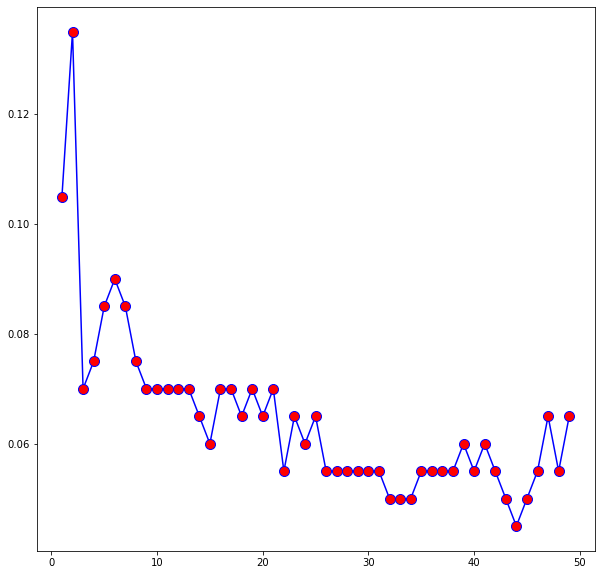

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.plot(range(1,50), error_rate, color ='blue', marker = 'o', markerfacecolor ='red', markersize =10)
plt.show

In [36]:
 knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)


print(classification_report(y_test,y_predict))

print('*'*100)

print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        86
           1       0.94      0.87      0.90       114

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

****************************************************************************************************
[[80  6]
 [15 99]]
